In [ ]:
## Importation des bibliothèques (utilisation de l'alias standard pd)
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
## Lecture
df = pds.read_csv('./train.csv', sep=",") # Utilisation de df comme nom principal

In [125]:
# Suppression des colonnes (identifiants et colonnes complexes/inutiles)
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

# Suppression des lignes où Embarked ou Fare sont manquants (selon votre choix)
df = df.dropna(subset=['Embarked', 'Fare'])

In [126]:
# Encodage binaire de 'Sex' (Label Encoding)
df['Sex'] = df['Sex'].replace(['male','female'],[0,1])
df

C:\Users\louis\AppData\Local\Temp\ipykernel_24956\951094342.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(['male','female'],[0,1])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [127]:
df_encoded_all = pds.get_dummies(df, columns=['Embarked'], drop_first=True)
df_encoded_all

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True
887,1,1,1,19.0,0,0,30.0000,False,True
888,0,3,1,NaN,1,2,23.4500,False,True
889,1,1,0,26.0,0,0,30.0000,False,False


In [128]:
valeurs_nan = df_encoded_all[df_encoded_all['Age'].isna()]
valeurs_nan.index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [129]:
# --- 1. Séparation des données pour l'imputation ---

# Features de clustering (toutes les colonnes sauf Age et Survived)
features = [col for col in df_encoded_all.columns if col not in ['Age', 'Survived']]

X_full = df_encoded_all[features]
y_age = df_encoded_all['Age']

# Séparation des lignes à connaître (Age non-NaN) et à imputer (Age NaN)
X_age_connu = X_full[y_age.notnull()]
X_age_manquant = X_full[y_age.isnull()]

# --- 2. Mise à l'échelle des Features de Clustering (CRUCIAL!) ---

scaler = StandardScaler()
X_scaled_connu = scaler.fit_transform(X_age_connu)
X_scaled_manquant = scaler.transform(X_age_manquant)

In [130]:
df_encoded = df_encoded.dropna()

In [131]:
# Les features pour le clustering
X_train_cluster = df_encoded.loc[df_age_connu.index]
y_age_train = df_age_connu['Age']

# Mise à l'échelle (CRUCIAL pour K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_cluster)

# 1. Définir le nombre de clusters K. (Il faudrait optimiser ce K, mais disons K=5 pour l'exemple)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)

# 2. Entraîner le modèle sur les données avec Age connu
kmeans.fit(X_scaled)

# 3. Ajouter l'étiquette de cluster au DataFrame
df_age_connu['Cluster'] = kmeans.labels_
# Calculer l'âge moyen pour chaque cluster
moyenne_age_par_cluster = df_age_connu.groupby('Cluster')['Age'].mean()
print("Moyennes d'âge par cluster :")
print(moyenne_age_par_cluster)

c:\Users\louis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Moyennes d'âge par cluster :
Cluster
0    21.234909
1    27.984694
2    26.831897
3    31.600000
4     9.600000
5    32.078400
6    27.685185
7    39.538462
8    35.872123
9    37.071429
Name: Age, dtype: float64


C:\Users\louis\AppData\Local\Temp\ipykernel_24956\2881048221.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_connu['Cluster'] = kmeans.labels_


In [132]:
# --- 1. Imputation de l'Âge ---
K_optimal = 10 # <--- REMPLACEZ PAR VOTRE VALEUR OPTIMALE

# Entraînement final
kmeans_final = KMeans(n_clusters=K_optimal, random_state=42, n_init=10)
kmeans_final.fit(X_scaled_connu)

# Créer un DataFrame avec Age et Cluster pour calculer les moyennes
df_age_connu_labels = pds.DataFrame(X_scaled_connu, index=X_age_connu.index)
df_age_connu_labels['Age'] = y_age.dropna()
df_age_connu_labels['Cluster'] = kmeans_final.labels_

# Calculer la moyenne d'âge par cluster
moyenne_age_par_cluster = df_age_connu_labels.groupby('Cluster')['Age'].mean()

# Prédire le cluster pour les NaN
clusters_manquants = kmeans_final.predict(X_scaled_manquant)

# Imputation
ages_imputes = [moyenne_age_par_cluster[cluster] for cluster in clusters_manquants]
imputation_serie = pds.Series(ages_imputes, index=X_age_manquant.index)

# Mettre à jour la colonne 'Age' dans le DataFrame principal
df_encoded_all.loc[df_encoded_all['Age'].isnull(), 'Age'] = imputation_serie

print(f"Imputation de l'âge par clustering terminée. NaN restants dans Age : {df_encoded_all['Age'].isnull().sum()}")


c:\Users\louis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Imputation de l'âge par clustering terminée. NaN restants dans Age : 0


In [133]:
df = df_encoded_all

In [134]:
df.iloc[valeurs_nan.index]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
5,0,3,0,28.089286,0,0,8.4583,True,False
17,1,2,0,29.558000,0,0,13.0000,False,True
19,1,3,1,21.564528,0,0,7.2250,False,False
26,0,3,0,21.564528,0,0,7.2250,False,False
28,1,3,1,28.089286,0,0,7.8792,True,False
...,...,...,...,...,...,...,...,...,...
861,0,2,0,21.000000,1,0,11.5000,False,True
865,1,2,1,42.000000,0,0,13.0000,False,True
870,0,3,0,26.000000,0,0,7.8958,False,True
880,1,2,1,25.000000,0,1,26.0000,False,True


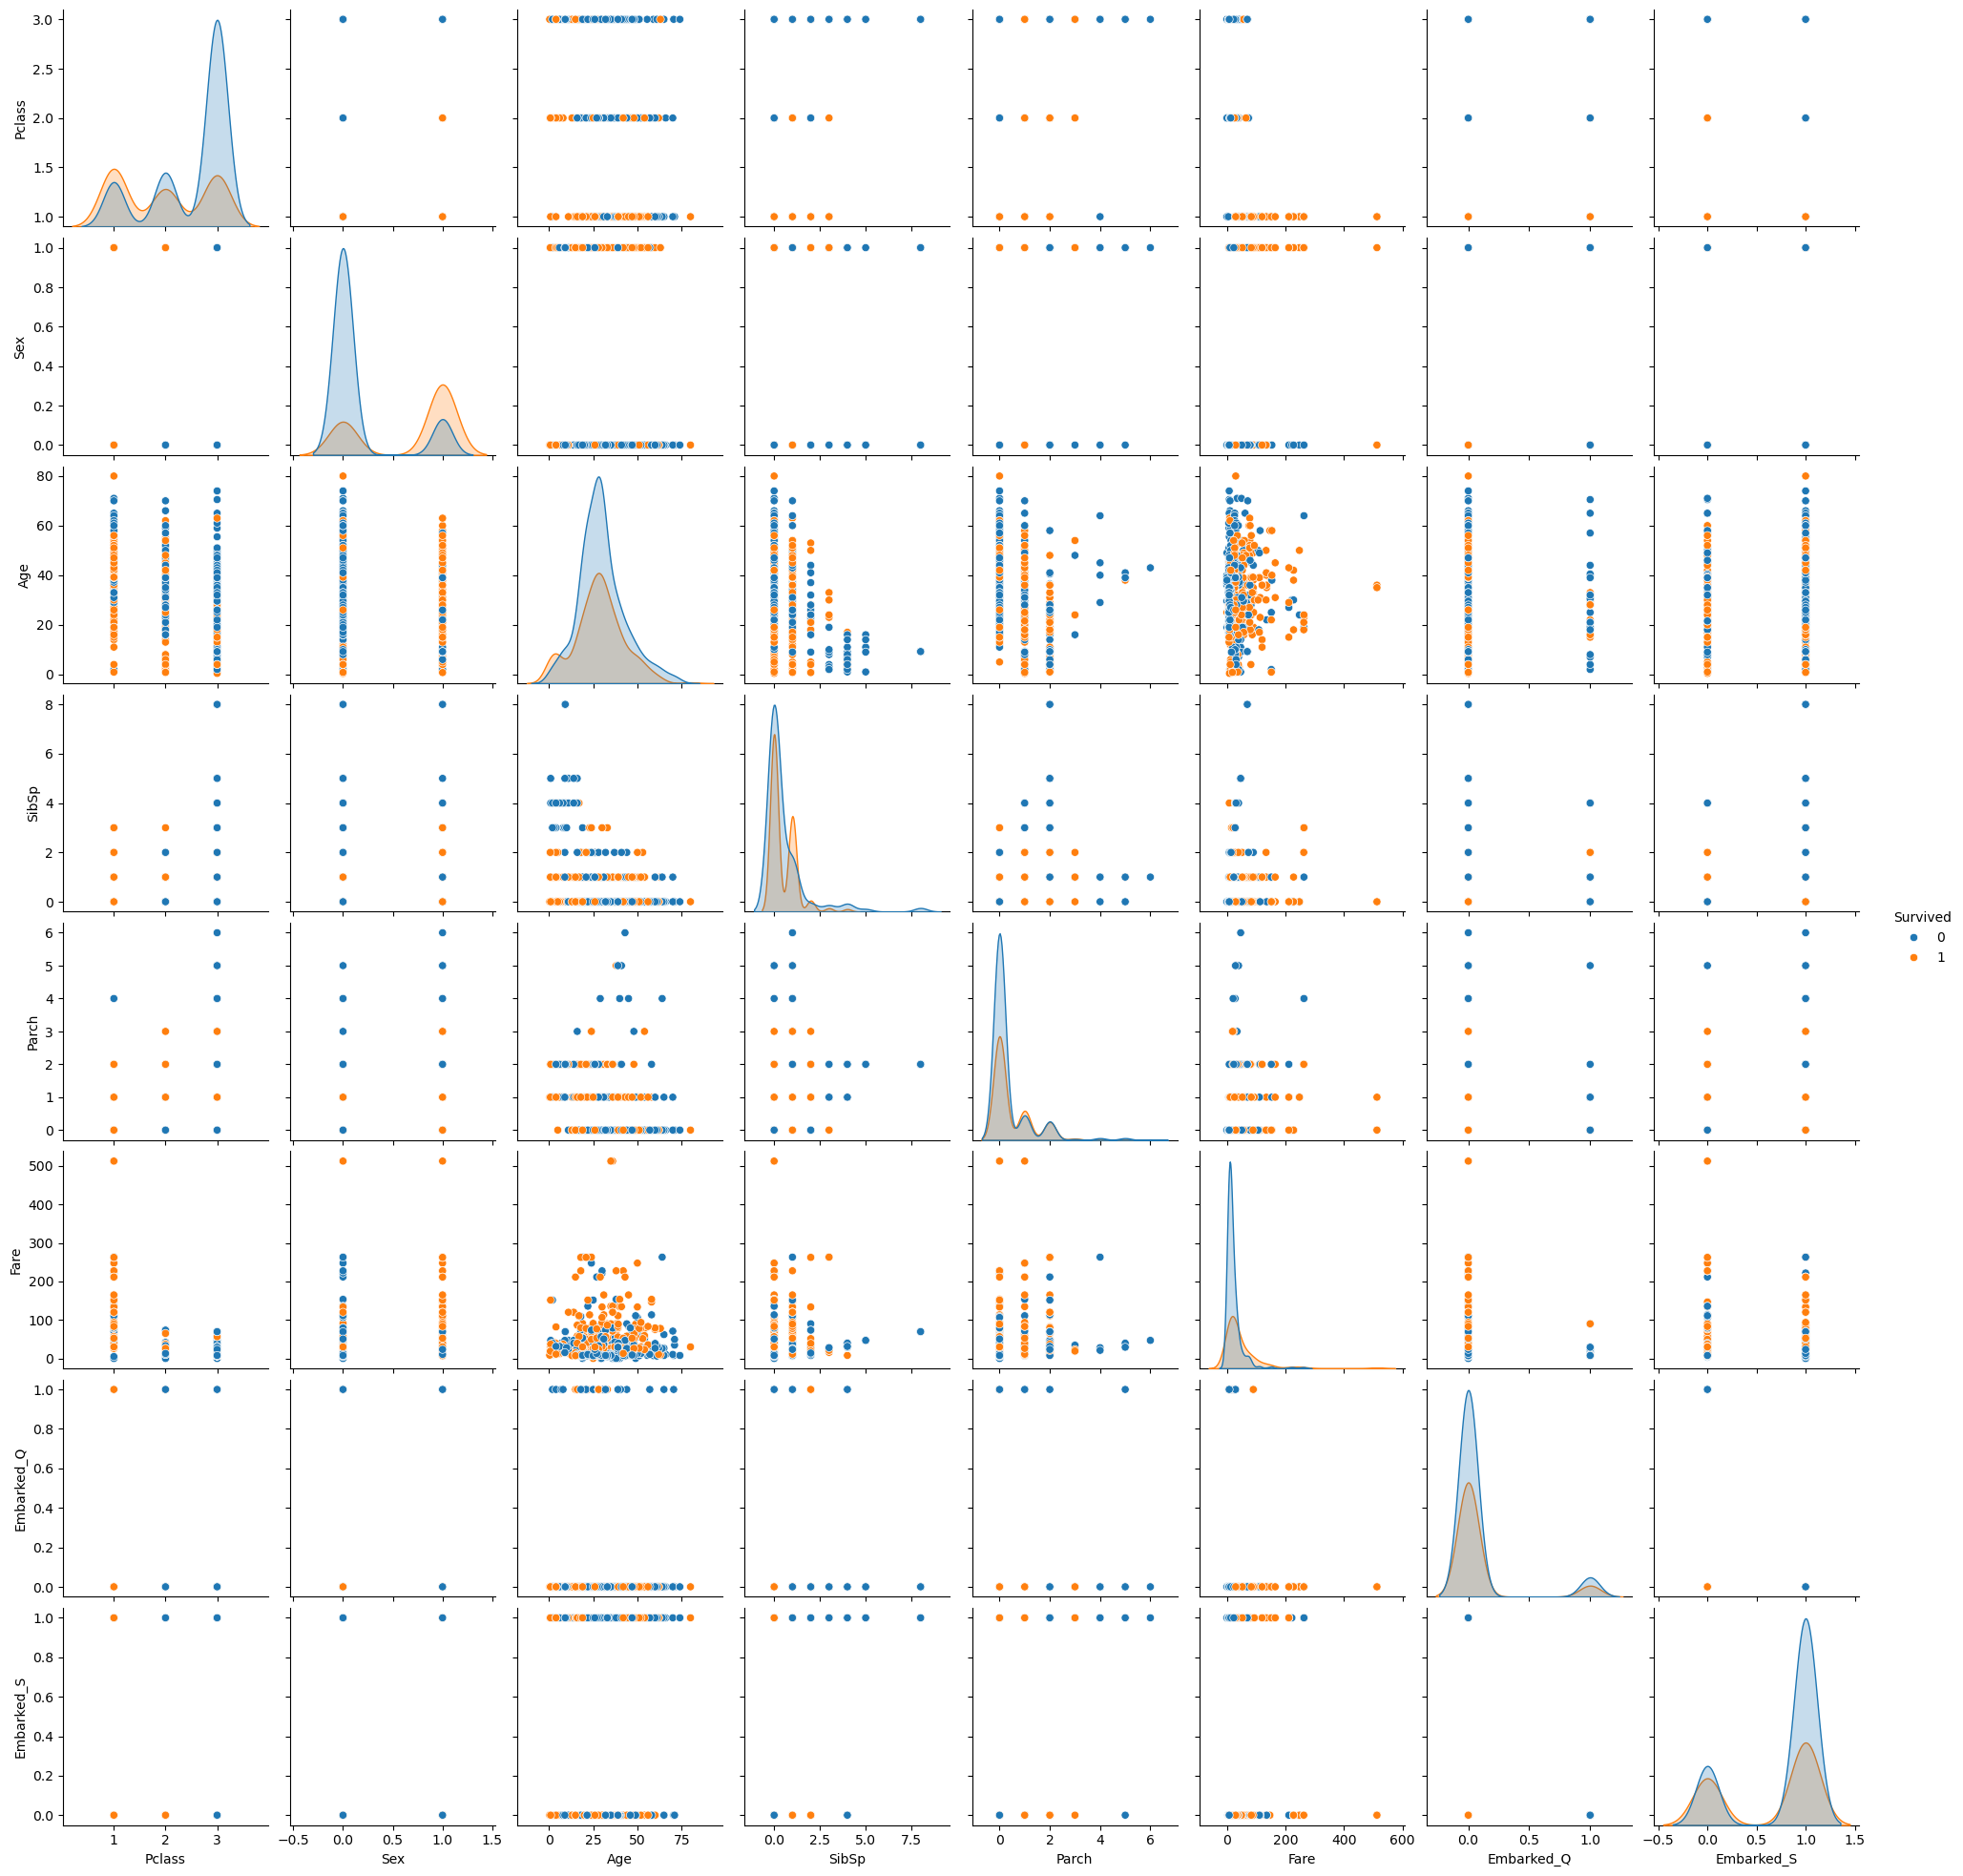

In [139]:
df2 = df.copy()
sns.pairplot(data=df2 , hue = 'Survived')

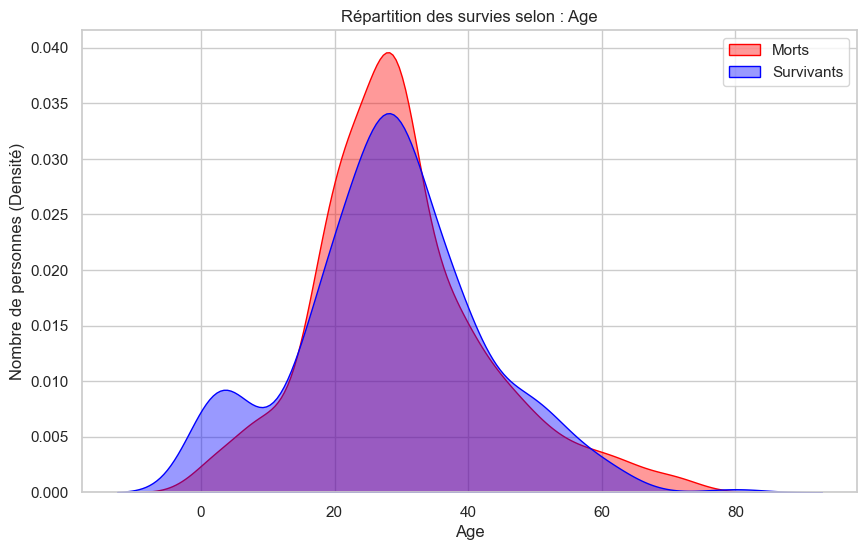

In [141]:
# On définit le style
sns.set_theme(style="whitegrid")

def tracer_survie(df, colonne_choisie):
    plt.figure(figsize=(10, 6))
    
    # Courbe des Morts (Survived == 0)
    sns.kdeplot(data=df[df['Survived'] == 0], x=colonne_choisie, 
                fill=True, color="red", label="Morts", alpha=0.4)
    
    # Courbe des Survivants (Survived == 1)
    sns.kdeplot(data=df[df['Survived'] == 1], x=colonne_choisie, 
                fill=True, color="blue", label="Survivants", alpha=0.4)
    
    plt.title(f'Répartition des survies selon : {colonne_choisie}')
    plt.xlabel(colonne_choisie)
    plt.ylabel('Nombre de personnes (Densité)')
    plt.legend()
    plt.show()

# Utilisation
tracer_survie(df, 'Age')

In [142]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,True
1,1,1,1,38.000000,1,0,71.2833,False,False
2,1,3,1,26.000000,0,0,7.9250,False,True
3,1,1,1,35.000000,1,0,53.1000,False,True
4,0,3,0,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,True
887,1,1,1,19.000000,0,0,30.0000,False,True
888,0,3,1,25.947073,1,2,23.4500,False,True
889,1,1,0,26.000000,0,0,30.0000,False,False


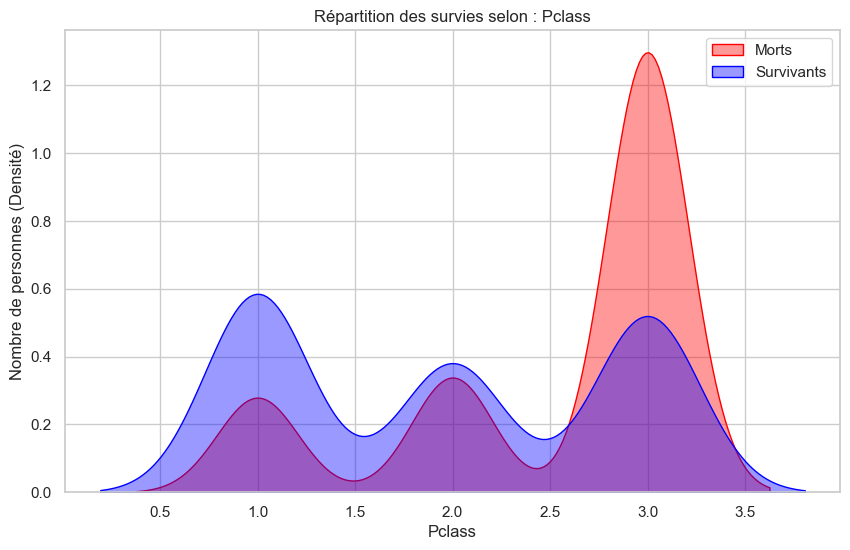

In [143]:
tracer_survie(df, 'Pclass')

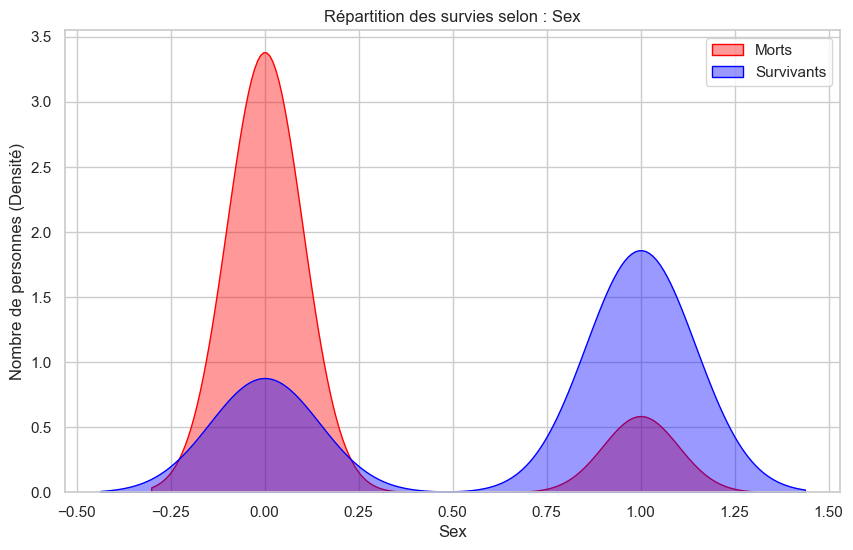

In [146]:
tracer_survie(df, 'Sex')

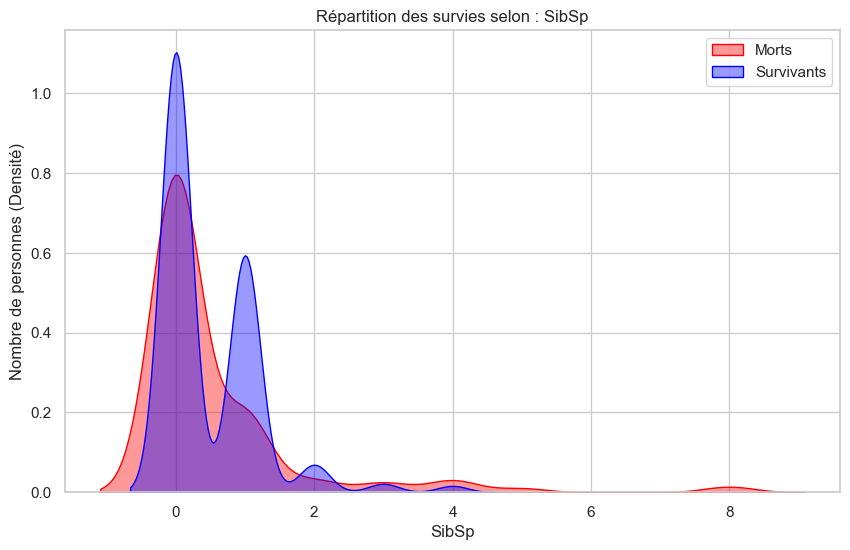

In [149]:
tracer_survie(df, 'SibSp')

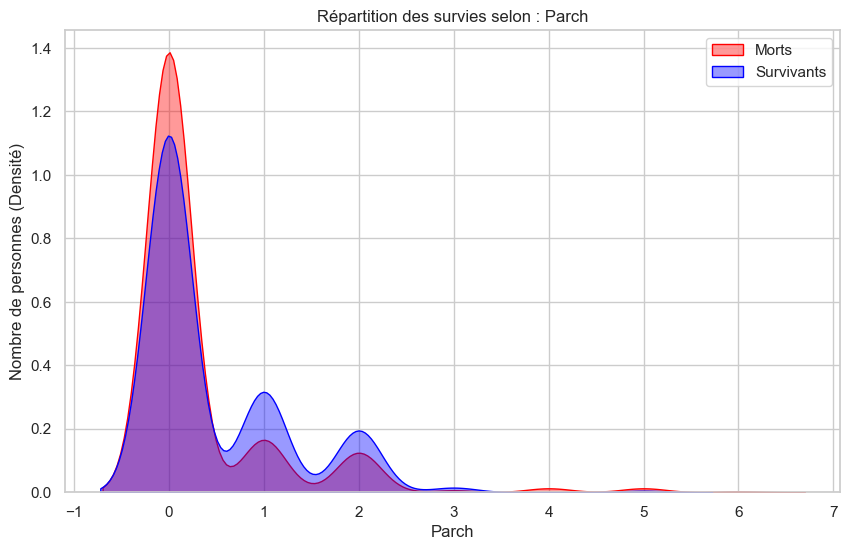

In [151]:
tracer_survie(df ,"Parch")

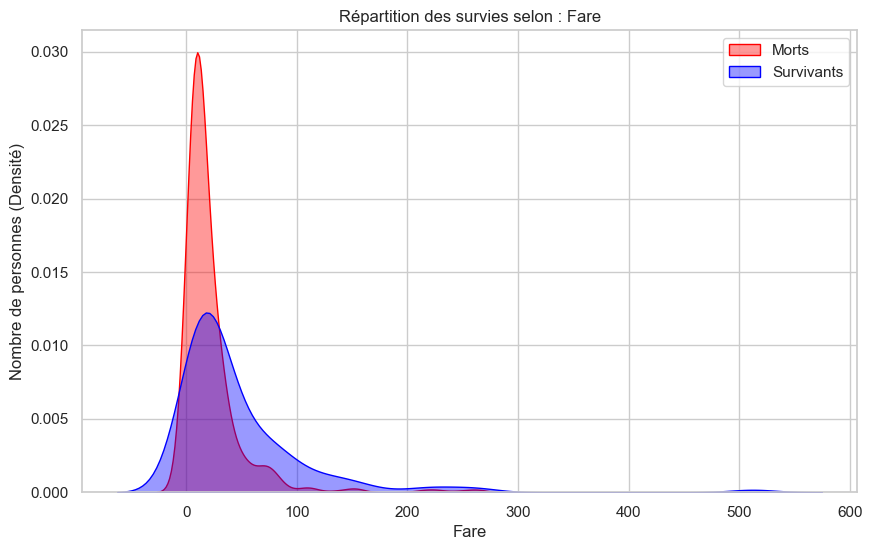

In [152]:
tracer_survie(df, "Fare")

In [153]:

X = df.drop('Survived', axis=1)
Y = df['Survived']
features = ["Pclass","Age","SibSp","Parch","Fare"]
scaler = MinMaxScaler()

X_normalized = X.copy()
X_normalized[features] = scaler.fit_transform(X[features])
X_normalized

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1.0,0,0.271174,0.125,0.000000,0.014151,False,True
1,0.0,1,0.472229,0.125,0.000000,0.139136,False,False
2,1.0,1,0.321438,0.000,0.000000,0.015469,False,True
3,0.0,1,0.434531,0.125,0.000000,0.103644,False,True
4,1.0,0,0.434531,0.000,0.000000,0.015713,False,True
...,...,...,...,...,...,...,...,...
886,0.5,0,0.334004,0.000,0.000000,0.025374,False,True
887,0.0,1,0.233476,0.000,0.000000,0.058556,False,True
888,1.0,1,0.320772,0.125,0.333333,0.045771,False,True
889,0.0,0,0.321438,0.000,0.000000,0.058556,False,False


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y,test_size=0.3,random_state=42)

In [191]:
n_0 = 0
n_1 = 0
for i in y_train : 
    if i == 0 : 
        n_0 += 1
    else : 
        n_1 += 1
n_0 , n_1

(382, 240)

In [156]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)

In [173]:
def depth(n):
    out=[]
    for i in range (1,n):
        modele_dt_simple = tree.DecisionTreeClassifier(max_depth=i, random_state=42)
        modele_dt_simple.fit(X_train, y_train)
        predictions_y=modele_dt_simple.predict(X_test)
        accuracy = accuracy_score(y_test, predictions_y)
        out.append(accuracy)
    return out

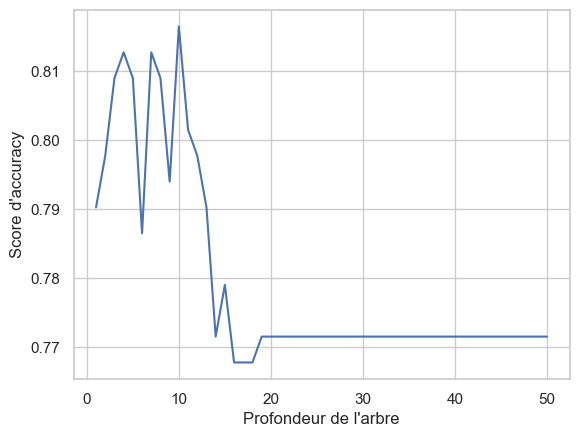

0.8164794007490637

In [176]:
abscice=np.linspace(1,50)
ordo=depth(51)
plt.plot(abscice,ordo)
plt.ylabel("Score d'accuracy")
plt.xlabel("Profondeur de l'arbre")
plt.show()
ordo[9]


In [177]:
clf_f = tree.DecisionTreeClassifier(max_depth=10 , random_state=42)
clf_f=clf_f.fit(X_train,y_train)

In [179]:
from sklearn.metrics import confusion_matrix, classification_report

# Étape 2B : Matrice de Confusion
matrice_conf = confusion_matrix(y_test, predictions_y)
print("\nMatrice de Confusion :")
print(matrice_conf)

# Étape 2C : Rapport de Classification (Précision, Rappel, F1-Score)
rapport_classif = classification_report(y_test, predictions_y)
print("\nRapport de Classification :")
print(rapport_classif)
predictions_y=clf_f.predict(X_test)
accuracy = accuracy_score(y_test, predictions_y)
accuracy


Matrice de Confusion :
[[149  18]
 [ 35  65]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       167
           1       0.78      0.65      0.71       100

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



0.8164794007490637

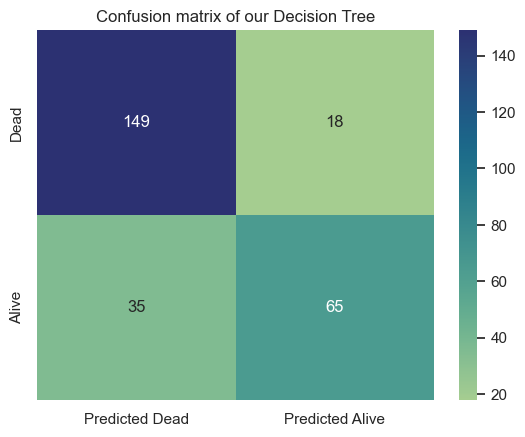

In [181]:
sns.heatmap(matrice_conf, annot=True, fmt="d", cmap="crest", xticklabels=['Predicted Dead','Predicted Alive'], yticklabels=[
    'Dead','Alive'])
plt.title("Confusion matrix of our Decision Tree")
plt.show()

In [194]:
#Evaluation avec les autres indicateurs

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_y))
report_dict = classification_report(
    y_test,
    predictions_y,
    output_dict=True
)

df_report = pds.DataFrame(report_dict).transpose()

df_report = df_report.round(6)

df_report

#Cross-validation

from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics
scoring = ['accuracy', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted']
cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_validate(clf_f, X_normalized, Y , scoring=scoring,
                        cv=cv, return_train_score=False)

scores.keys()

print('Global accuracy over all folds: %0.6f (+/- %0.6f)'
      % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))

print('For each metric, list the score values on each fold:')
for metric in sorted(scores.keys()):
    print(
        str(['{:.6f}'.format(value) for value in scores[metric]])
        + ' ' + metric
    )

df_scores = pds.DataFrame({
    'Accuracy': scores['test_accuracy'],
    'Precision (weighted)': scores['test_precision_weighted'],
    'Recall (weighted)': scores['test_recall_weighted'],
    'F1 (weighted)': scores['test_f1_weighted']
})

df_scores.index = [f'Fold {i+1}' for i in range(len(df_scores))]
df_scores.loc['Mean'] = df_scores.mean()
df_scores.loc['Std'] = df_scores.std() 

df_scores = df_scores.round(6)

df_scores

#Copier-coller directement dans canva

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       167
           1       0.76      0.74      0.75       100

    accuracy                           0.82       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267

Global accuracy over all folds: 0.785127 (+/- 0.042235)
For each metric, list the score values on each fold:
['0.008734', '0.006085', '0.003371', '0.003305', '0.001420'] fit_time
['0.020015', '0.011087', '0.012529', '0.013385', '0.012730'] score_time
['0.769663', '0.797753', '0.820225', '0.775281', '0.762712'] test_accuracy
['0.753936', '0.783279', '0.800476', '0.763329', '0.739341'] test_f1_macro
['0.768614', '0.796494', '0.815288', '0.775878', '0.757420'] test_f1_weighted
['0.756501', '0.787281', '0.823925', '0.762037', '0.754501'] test_precision_macro
['0.768018', '0.796077', '0.821705', '0.776675', '0.759680'] test_precision_weighted
['0.751872', '0.780214', '0

,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
Fold 1,0.769663,0.768018,0.769663,0.768614
Fold 2,0.797753,0.796077,0.797753,0.796494
Fold 3,0.820225,0.821705,0.820225,0.815288
Fold 4,0.775281,0.776675,0.775281,0.775878
Fold 5,0.762712,0.759680,0.762712,0.757420
Mean,0.785127,0.784431,0.785127,0.782739
Std,0.021118,0.022213,0.021118,0.020670


In [196]:
m0=np.mean([0.020015, 0.011087, 0.012529, 0.013385, 0.012730])
std=np.std([0.020015, 0.011087, 0.012529, 0.013385, 0.012730])
m0 , std

(0.0139492, 0.003124351350280567)